# 데이터 로드
classification에 사용

In [1]:
!pip install -q tensorflow-datasets tensorflow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data_Dataset
ds = tfds.load('beans', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteRKQOJ4/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteRKQOJ4/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteRKQOJ4/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [3]:
# batch : 데이터 세트의 연속 요소를 배치로 결합
# as_numpy_iterator() : 데이터 세트 요소의 중첩 구조를 유지

data = next(ds.batch(9999999).as_numpy_iterator())
image, label = data['image'], data['label']
print(image.shape)
print(label.shape)

(1034, 500, 500, 3)
(1034,)


# 이미지 시각화

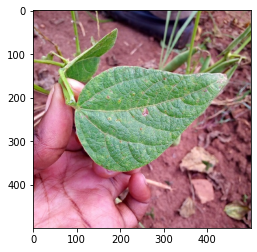

[1 0 1 ... 0 0 0]


In [4]:
import matplotlib.pyplot as plt

plt.imshow(image[0])
plt.show()
print(label)

# CIFAR10 적용

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

## 데이터 나누기

In [6]:
i = int(len(image)*0.8)

raw_train_x, raw_test_x = image[:i], image[i:]
raw_train_y, raw_test_y = label[:i], label[i:]

In [7]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

# 정규화
train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

(827, 500, 500, 3)
(827,)
(207, 500, 500, 3)
(207,)


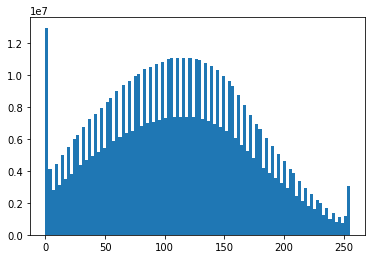

In [8]:
# 1차원 변환 후 시각화
plt.hist(raw_train_x.flatten(), bins=100)
plt.show()

1 B


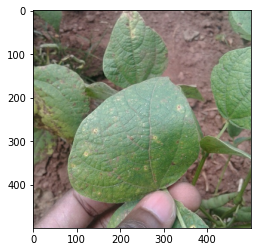

1 B


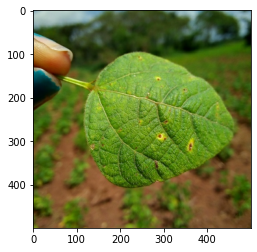

2 C


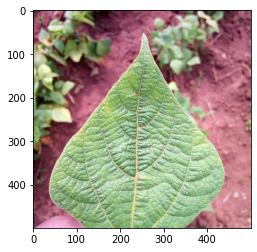

2 C


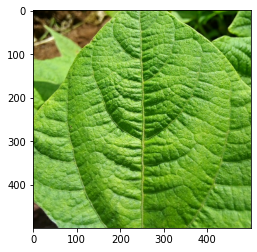

In [9]:
labels = ["A","B","C"]
def show_sample(i):
  print(raw_train_y[i], labels[raw_train_y[i]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [10]:
print(train_y[:50])

[1 0 1 2 1 1 2 1 2 1 1 1 2 0 2 1 1 1 0 0 1 0 0 0 0 1 0 0 0 2 2 1 1 1 1 1 1
 2 2 2 2 2 1 0 0 1 2 2 0 0]


# CNN 모델

CIFAR10 data 중 train data와의 차이 표시

In [11]:
model = keras.Sequential()
model.add(Input((500,500,3)))   # CHANGE
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))   # CHANGE
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))   # CHANGE

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=32)   # CHANGE : batch_size


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      3

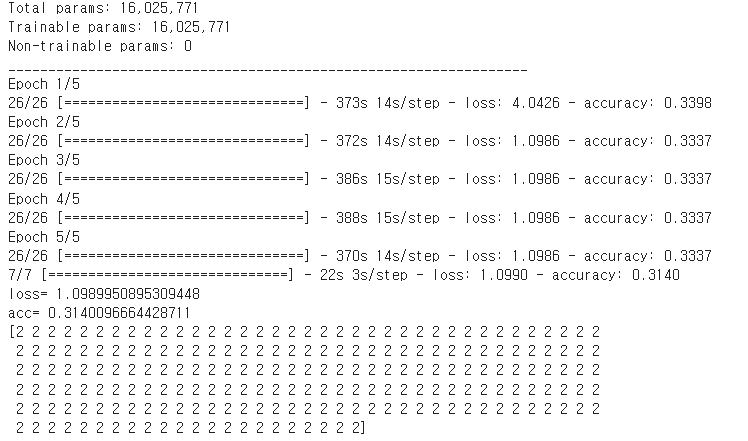


학습이 안되는 이유는 필터의 개수도 적고 이미지의 수도 적어서 그런거 같다고 하심

Dense_3과 dense_4의 차이가 커서 4를 더 늘려줄 것임 